In [1]:
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
from torchvision import transforms

transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512)),
        transforms.ToTensor()
    ]
)

image = Image.open('./datasets/images/cat.jpg')
transformed_image = transform(image)

print(transformed_image.shape)

torch.Size([3, 512, 512])


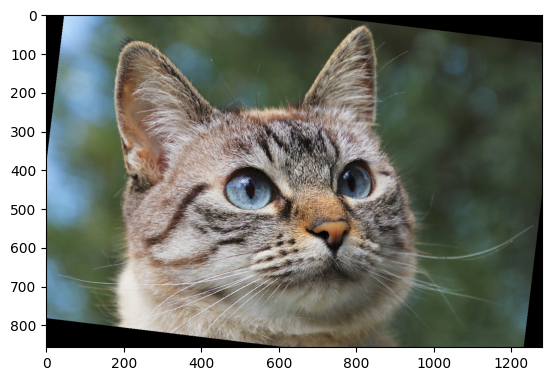

In [3]:
transform = transforms.Compose(
    [
        transforms.RandomRotation(degrees=30, expand=False, center=None),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5)
    ]
)

image = Image.open('./datasets/images/cat.jpg')
transformed_image = transform(image)
plt.imshow(transformed_image)

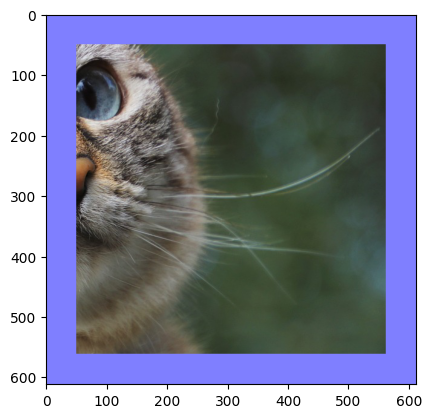

In [4]:
from PIL import Image
from torchvision import transforms

transform = transforms.Compose(
    [
        transforms.RandomCrop(size=(512, 512)),
        transforms.Pad(padding=50, fill=(127, 127, 255), padding_mode='constant')
    ]
)

image = Image.open('./datasets/images/cat.jpg')
transformed_image = transform(image)
plt.imshow(transformed_image)

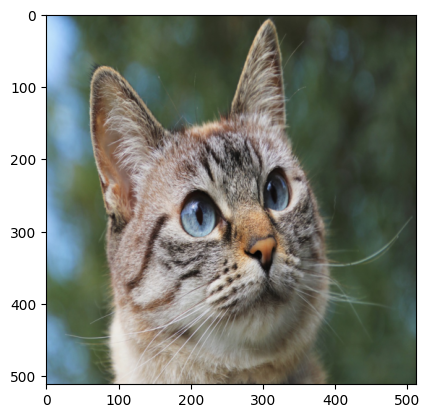

In [5]:
from PIL import Image
from torchvision import transforms

transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512))
    ]
)

image = Image.open('./datasets/images/cat.jpg')
transformed_image = transform(image)
plt.imshow(transformed_image)

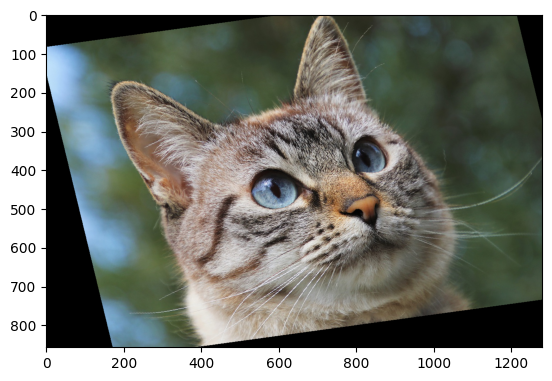

In [6]:
from PIL import Image
from torchvision import transforms

transform = transforms.Compose(
    [
        transforms.RandomAffine(
            degrees=15, translate=(0.2, 0.2),
            scale=(0.8, 1.2), shear=15
        )
    ]
)

image = Image.open('./datasets/images/cat.jpg')
transformed_image = transform(image)
plt.imshow(transformed_image)

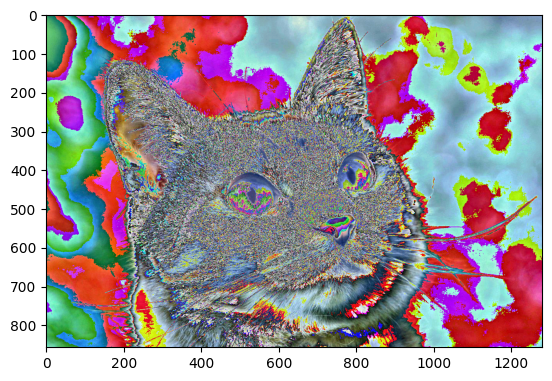

In [7]:
from PIL import Image
from torchvision import transforms

transform = transforms.Compose(
    [
        transforms.ColorJitter(
            brightness=0.3, contrast=0.3,
            saturation=0.3, hue=0.3
        ),
        transforms.ToTensor(),
        transforms.Normalize(
            mean = [0.485, 0.456, 0.406],
            std = [0.229, 0.224, 0.225]
        ),
        transforms.ToPILImage()
    ]
)

image = Image.open('./datasets/images/cat.jpg')
transformed_image = transform(image)
plt.imshow(transformed_image)

(857, 1280, 3) uint8


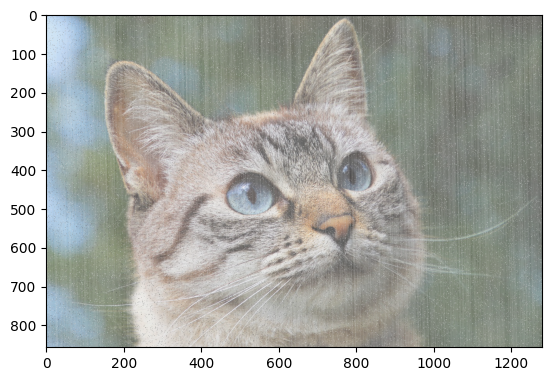

In [10]:
import numpy as np
np.bool = np.bool_
from PIL import Image
from torchvision import transforms
from imgaug import augmenters as iaa

class IaaTransforms:
    def __init__(self):
        self.seq = iaa.Sequential([
            iaa.SaltAndPepper(p=(0.03, 0.07)),
            iaa.Rain(speed=(0.3, 0.7))
        ])
    
    def __call__(self, images):
        images = np.array(images)
        print(images.shape, images.dtype)
        augmented = self.seq.augment_image(images)
        return Image.fromarray(augmented)
    
transform = transforms.Compose([
    IaaTransforms()
])

image = Image.open('./datasets/images/cat.jpg')
transformed_image = transform(image)
plt.imshow(transformed_image)

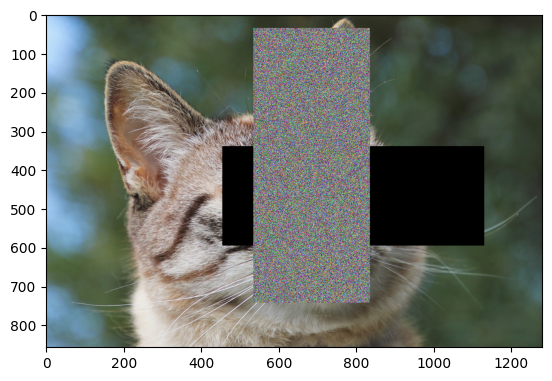

In [12]:
from PIL import Image
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(p=1.0, value=0),
    transforms.RandomErasing(p=1.0, value='random'),
    transforms.ToPILImage()
])

image = Image.open('./datasets/images/cat.jpg')
transformed_image = transform(image)
plt.imshow(transformed_image)

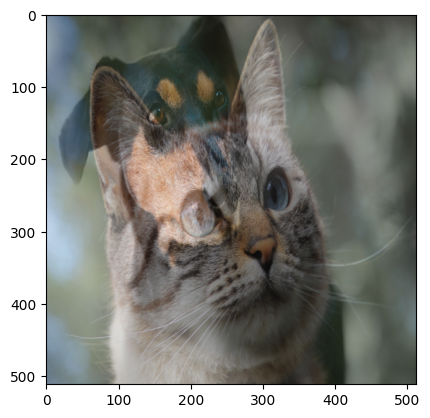

In [14]:
import numpy as np
from PIL import Image
from torchvision import transforms

class Mixup:
    def __init__(self, target, scale, alpha=0.5, beta=0.5):
        self.target = target
        self.scale = scale
        self.alpha = alpha
        self.beta = beta

    def __call__(self, image):
        image = np.array(image)
        target = self.target.resize(self.scale)
        target = np.array(target)
        mix_image = image * self.alpha + target * self.beta
        return Image.fromarray(mix_image.astype(np.uint8))
    
transform = transforms.Compose(
    [
        transforms.Resize((512, 512)),
        Mixup(
            target=Image.open('./datasets/images/dog.jpg'),
            scale=(512, 512),
            alpha=0.5,
            beta=0.5
        )
    ]
)

image = Image.open('./datasets/images/cat.jpg')
transformed_image = transform(image)
plt.imshow(transformed_image)